In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data1 = pd.read_excel(r"C:\Users\ADMIN\Downloads\DSTC V3\VNINDEX_cleaned.xlsx")
data1 = data1.drop("Unnamed: 0", axis =1)
data2 = pd.read_excel(r"C:\Users\ADMIN\Downloads\DSTC V3\HNXINDEX_cleaned.xlsx")
data2 = data2.drop("Unnamed: 0", axis =1)
data3 = pd.read_excel(r"C:\Users\ADMIN\Downloads\DSTC V3\UPCOM_cleaned.xlsx")
data3 = data3.drop("Unnamed: 0", axis =1)
data = pd.concat([data1, data2, data3], ignore_index=True)
data.info()

output_csv = r"C:\Users\ADMIN\Downloads\DSTC V3\AllIndex_cleaned.csv"
data.to_csv(output_csv, index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330513 entries, 0 to 330512
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   exchange         330513 non-null  object 
 1   ticker           330513 non-null  object 
 2   timestamp        330513 non-null  object 
 3   open             330513 non-null  float64
 4   high             330513 non-null  float64
 5   low              330513 non-null  float64
 6   close            330513 non-null  float64
 7   volume           330513 non-null  int64  
 8   ema_50           330513 non-null  float64
 9   ema_200          330513 non-null  float64
 10  macd             330513 non-null  float64
 11  macd_signal      330513 non-null  float64
 12  macd_diff        330513 non-null  float64
 13  rsi              330513 non-null  float64
 14  bollinger_hband  330513 non-null  float64
 15  bollinger_lband  330513 non-null  float64
 16  mfi              330513 non-null  floa

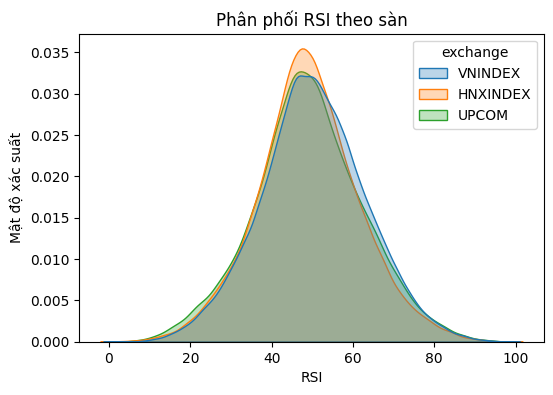

In [12]:
# Histogram phân phối RSI theo sàn
plt.figure(figsize=(6,4))
sns.kdeplot(data=data, x="rsi", hue="exchange", common_norm=False, fill=True, alpha=0.3)
plt.title("Phân phối RSI theo sàn")
plt.xlabel("RSI")
plt.ylabel("Mật độ xác suất")
plt.show()

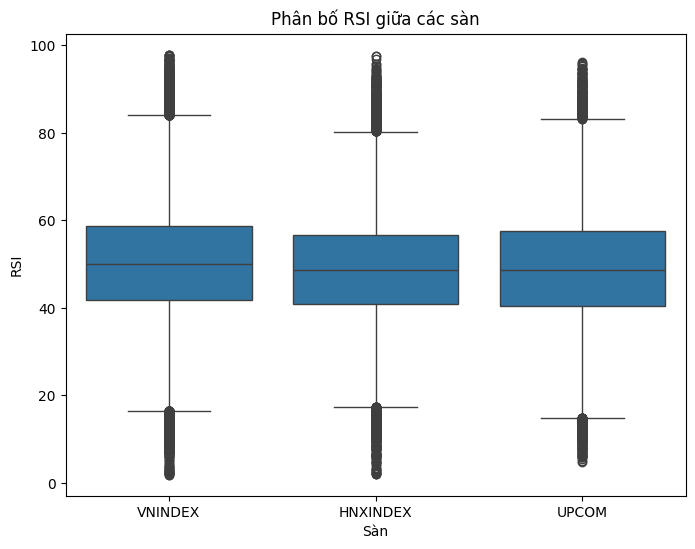

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data[data["exchange"].isin(["HNXINDEX","UPCOM","VNINDEX"])],
            x="exchange", y="rsi")
plt.title("Phân bố RSI giữa các sàn")
plt.xlabel("Sàn")
plt.ylabel("RSI")
plt.show()

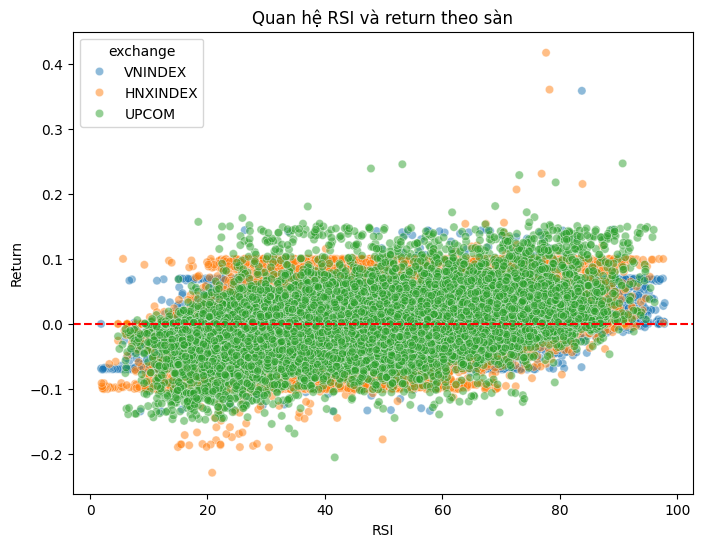

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data[data["exchange"].isin(["HNXINDEX","UPCOM","VNINDEX"])],
                x="rsi", y="return", hue="exchange", alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Quan hệ RSI và return theo sàn")
plt.xlabel("RSI")
plt.ylabel("Return")
plt.show()


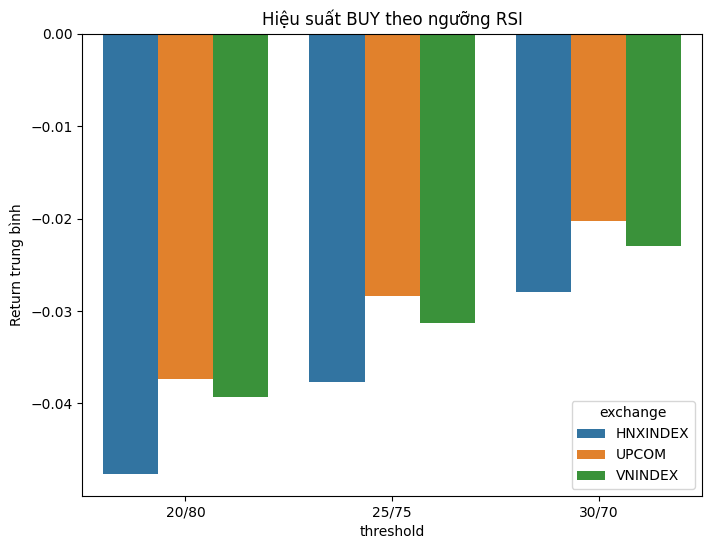

In [15]:
thresholds = [(20,80),(25,75),(30,70)]
results = []

for ex in ["HNXINDEX","UPCOM","VNINDEX"]:
    df_ex = data[data["exchange"]==ex]
    for low, high in thresholds:
        buy = df_ex[df_ex["rsi"]<low]["return"].mean()
        sell = df_ex[df_ex["rsi"]>high]["return"].mean()
        results.append({"exchange":ex, "threshold":f"{low}/{high}",
                        "buy_return":buy, "sell_return":sell})

res = pd.DataFrame(results)

plt.figure(figsize=(8,6))
sns.barplot(data=res, x="threshold", y="buy_return", hue="exchange")
plt.title("Hiệu suất BUY theo ngưỡng RSI")
plt.ylabel("Return trung bình")
plt.show()


In [16]:
def bootstrap_ci_mean(series, n_boot=2000, alpha=0.05):
    arr = series.dropna().values
    if len(arr) == 0: return (np.nan, np.nan, np.nan)
    boots = [np.mean(np.random.choice(arr, size=len(arr), replace=True)) for _ in range(n_boot)]
    return (np.mean(arr), np.percentile(boots, 100*alpha/2), np.percentile(boots, 100*(1-alpha/2)))

# Ví dụ: VNINDEX, low=20
vn_buy = data[(data["exchange"]=="VNINDEX") & (data["rsi"]<20)]["return"]
bootstrap_ci_mean(vn_buy)

(-0.03934746662693477, -0.040578153348834765, -0.03805225339401564)

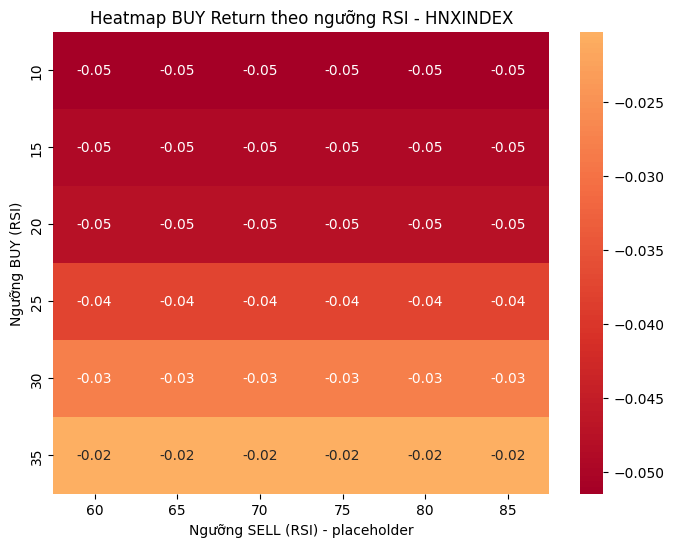

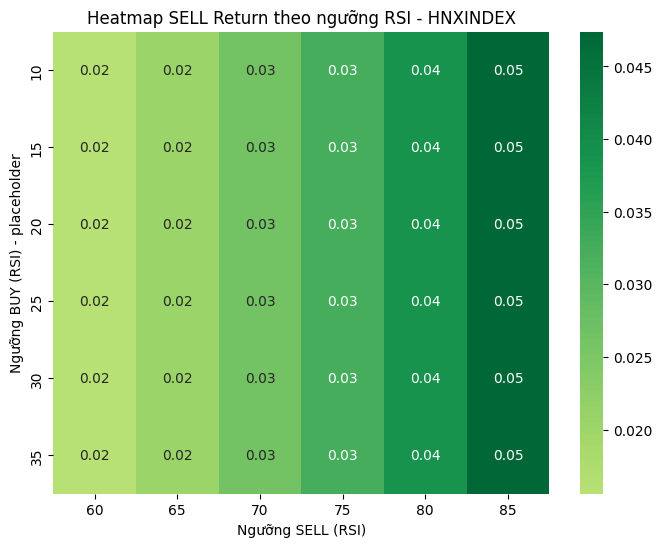

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_hnxindex = data[data["exchange"]=="HNXINDEX"]

# Heatmap BUY (RSI < low)

heatmap_buy = []
for low in range(10,40,5):    
    for high in range(60,90,5): 
        avg_return = data_hnxindex[data_hnxindex["rsi"]<low]["return"].mean()
        heatmap_buy.append([low, high, avg_return])

heatmap_buy = pd.DataFrame(heatmap_buy, columns=["low","high","avg_return"])
pivot_buy = heatmap_buy.pivot(index="low", columns="high", values="avg_return")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_buy, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Heatmap BUY Return theo ngưỡng RSI - HNXINDEX")
plt.xlabel("Ngưỡng SELL (RSI) - placeholder")
plt.ylabel("Ngưỡng BUY (RSI)")
plt.show()

# Heatmap SELL (RSI > high)

heatmap_sell = []
for low in range(10,40,5):    
    for high in range(60,90,5): 
        avg_return = data_hnxindex[data_hnxindex["rsi"]>high]["return"].mean()
        heatmap_sell.append([low, high, avg_return])

heatmap_sell = pd.DataFrame(heatmap_sell, columns=["low","high","avg_return"])
pivot_sell = heatmap_sell.pivot(index="low", columns="high", values="avg_return")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_sell, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Heatmap SELL Return theo ngưỡng RSI - HNXINDEX")
plt.xlabel("Ngưỡng SELL (RSI)")
plt.ylabel("Ngưỡng BUY (RSI) - placeholder")
plt.show()


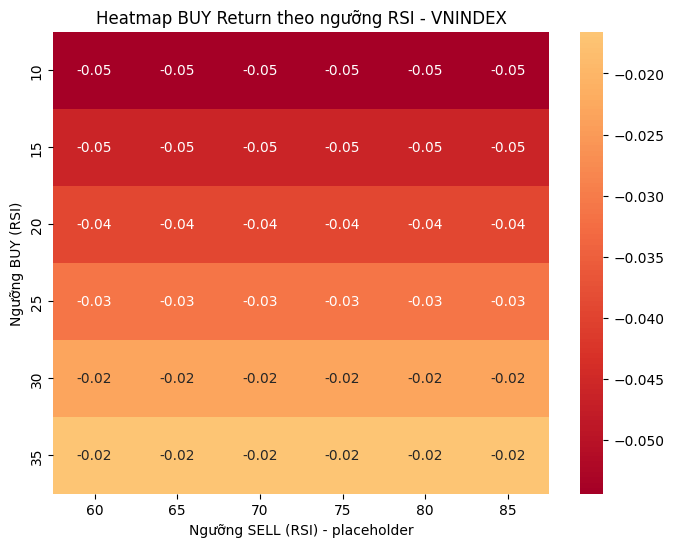

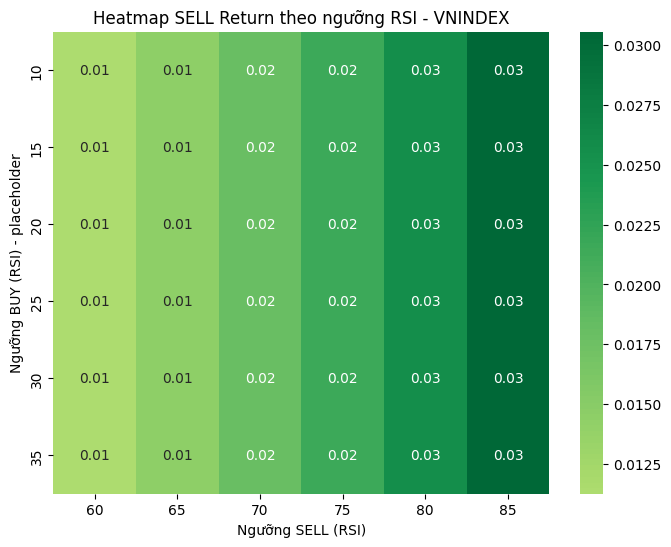

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_vnindex = data[data["exchange"]=="VNINDEX"]

# Heatmap BUY (RSI < low)

heatmap_buy = []
for low in range(10,40,5):    
    for high in range(60,90,5): 
        avg_return = data_vnindex[data_vnindex["rsi"]<low]["return"].mean()
        heatmap_buy.append([low, high, avg_return])

heatmap_buy = pd.DataFrame(heatmap_buy, columns=["low","high","avg_return"])
pivot_buy = heatmap_buy.pivot(index="low", columns="high", values="avg_return")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_buy, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Heatmap BUY Return theo ngưỡng RSI - VNINDEX")
plt.xlabel("Ngưỡng SELL (RSI) - placeholder")
plt.ylabel("Ngưỡng BUY (RSI)")
plt.show()

# Heatmap SELL (RSI > high)

heatmap_sell = []
for low in range(10,40,5):    
    for high in range(60,90,5): 
        avg_return = data_vnindex[data_vnindex["rsi"]>high]["return"].mean()
        heatmap_sell.append([low, high, avg_return])

heatmap_sell = pd.DataFrame(heatmap_sell, columns=["low","high","avg_return"])
pivot_sell = heatmap_sell.pivot(index="low", columns="high", values="avg_return")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_sell, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Heatmap SELL Return theo ngưỡng RSI - VNINDEX")
plt.xlabel("Ngưỡng SELL (RSI)")
plt.ylabel("Ngưỡng BUY (RSI) - placeholder")
plt.show()


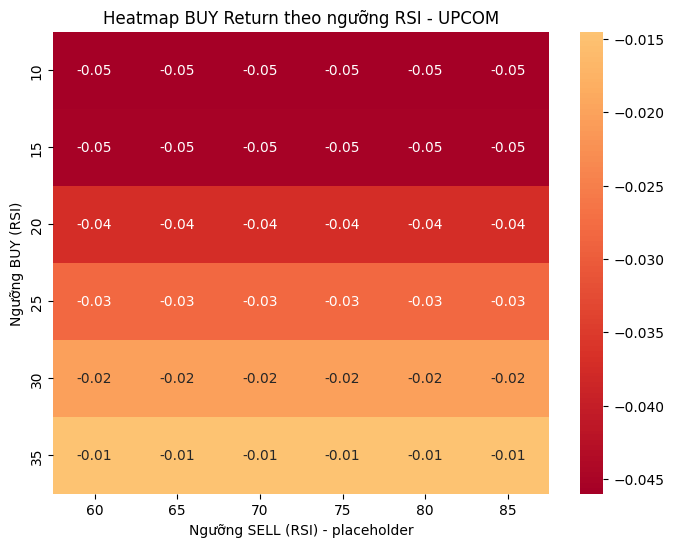

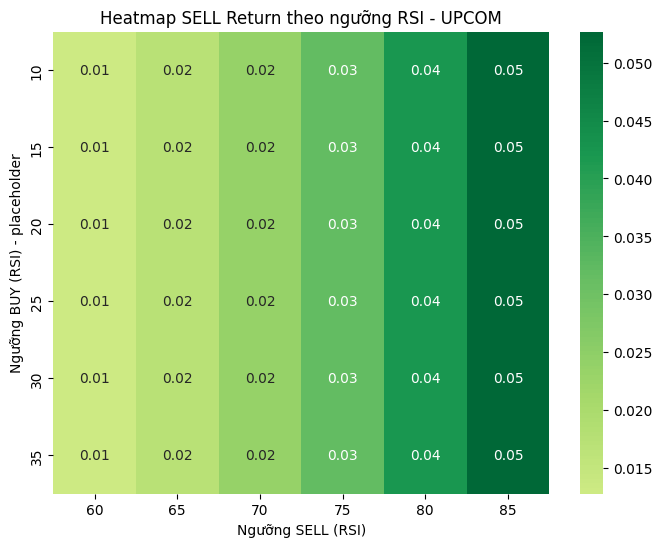

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_upcom = data[data["exchange"]=="UPCOM"]

# Heatmap BUY (RSI < low)

heatmap_buy = []
for low in range(10,40,5):    
    for high in range(60,90,5): 
        avg_return = data_upcom[data_upcom["rsi"]<low]["return"].mean()
        heatmap_buy.append([low, high, avg_return])

heatmap_buy = pd.DataFrame(heatmap_buy, columns=["low","high","avg_return"])
pivot_buy = heatmap_buy.pivot(index="low", columns="high", values="avg_return")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_buy, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Heatmap BUY Return theo ngưỡng RSI - UPCOM")
plt.xlabel("Ngưỡng SELL (RSI) - placeholder")
plt.ylabel("Ngưỡng BUY (RSI)")
plt.show()

# Heatmap SELL (RSI > high)

heatmap_sell = []
for low in range(10,40,5):    
    for high in range(60,90,5): 
        avg_return = data_upcom[data_upcom["rsi"]>high]["return"].mean()
        heatmap_sell.append([low, high, avg_return])

heatmap_sell = pd.DataFrame(heatmap_sell, columns=["low","high","avg_return"])
pivot_sell = heatmap_sell.pivot(index="low", columns="high", values="avg_return")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_sell, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Heatmap SELL Return theo ngưỡng RSI - UPCOM")
plt.xlabel("Ngưỡng SELL (RSI)")
plt.ylabel("Ngưỡng BUY (RSI) - placeholder")
plt.show()


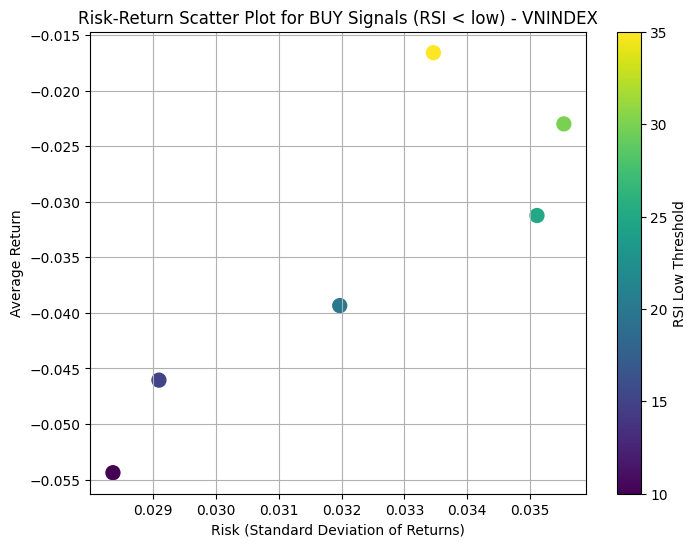

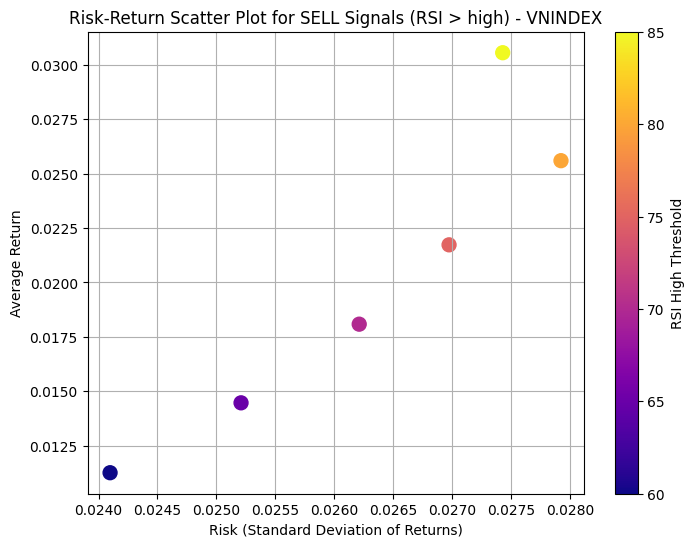

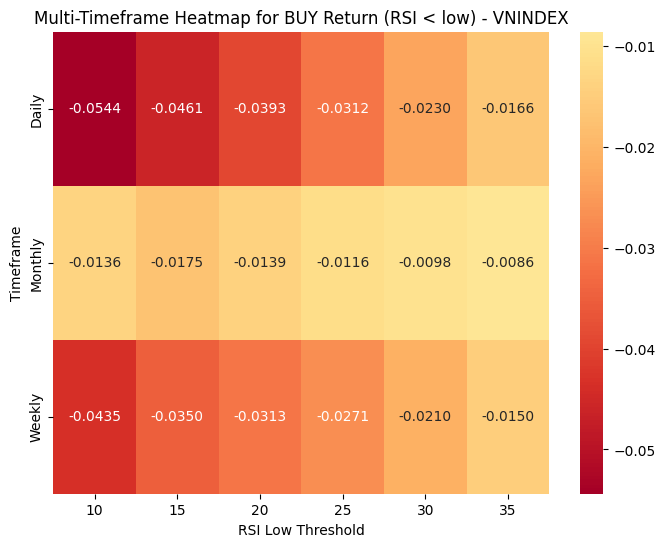

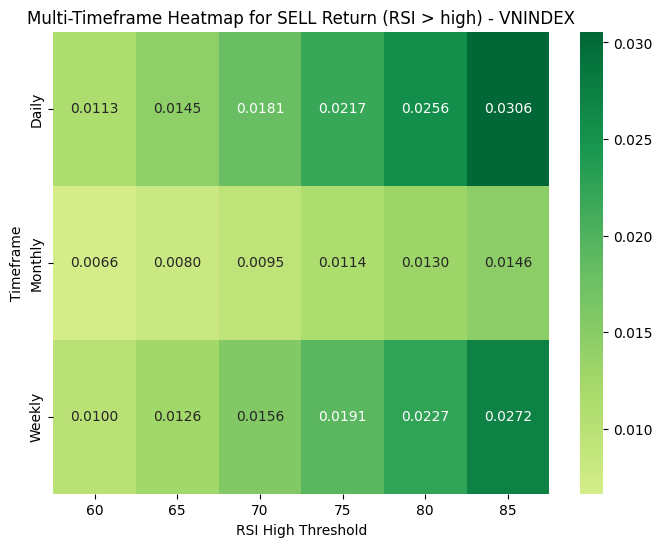

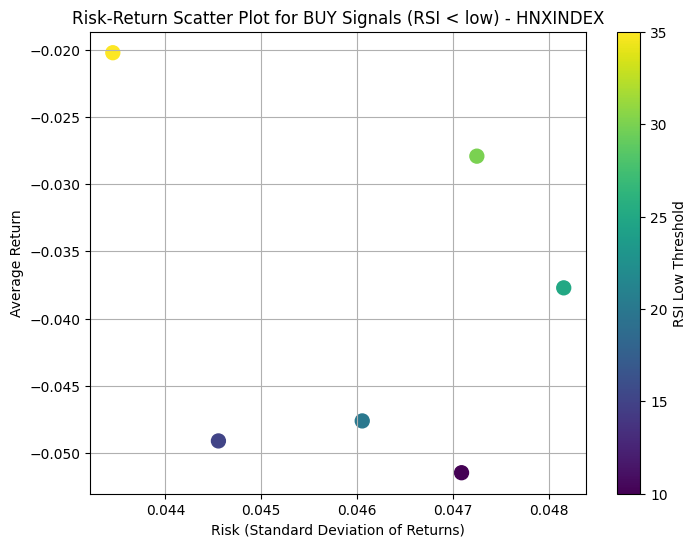

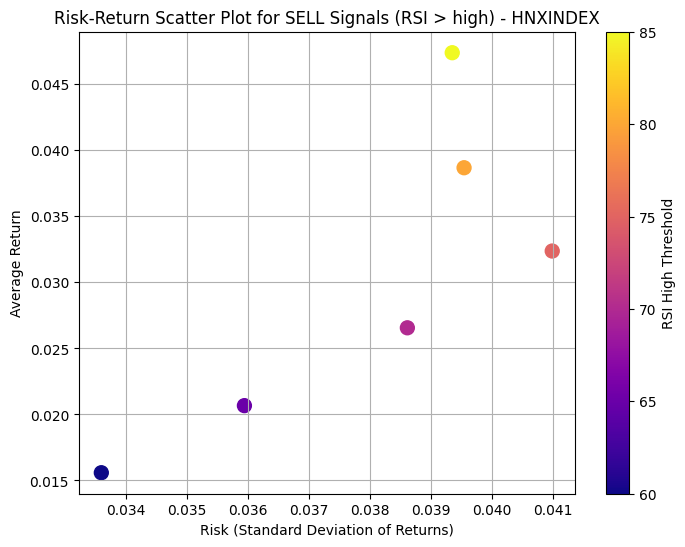

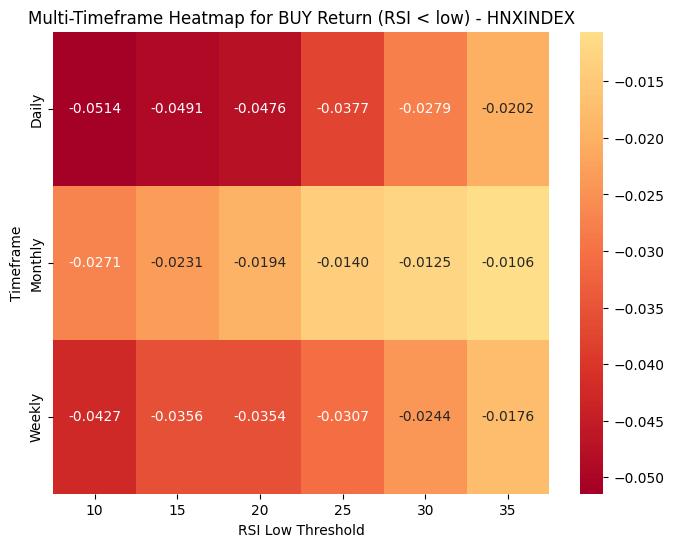

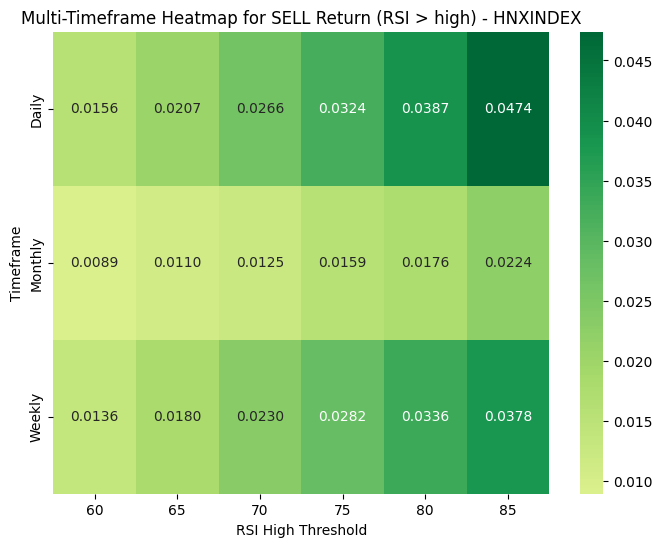

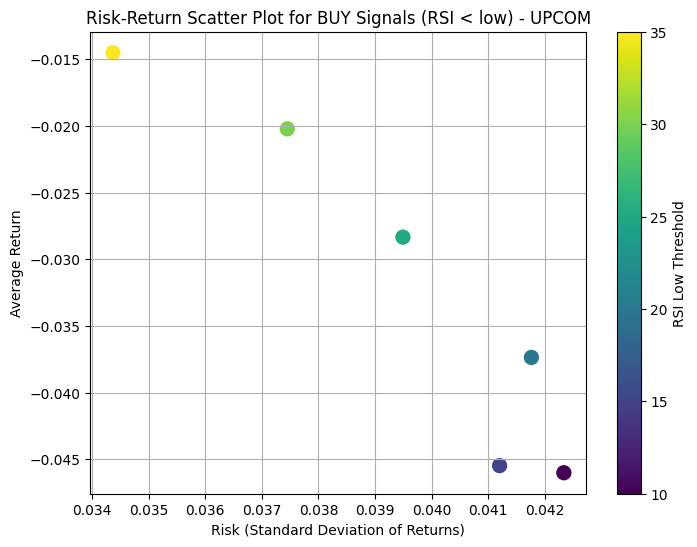

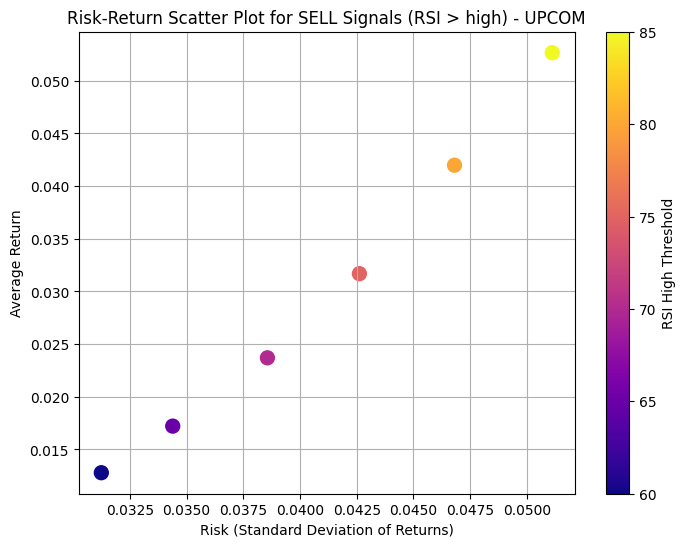

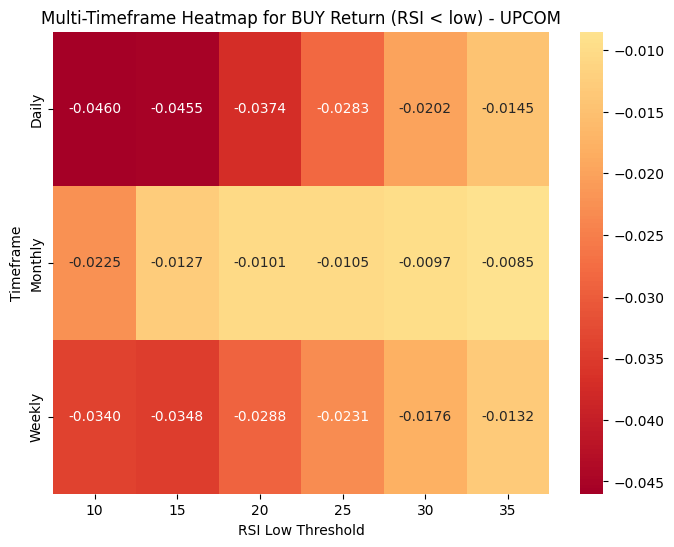

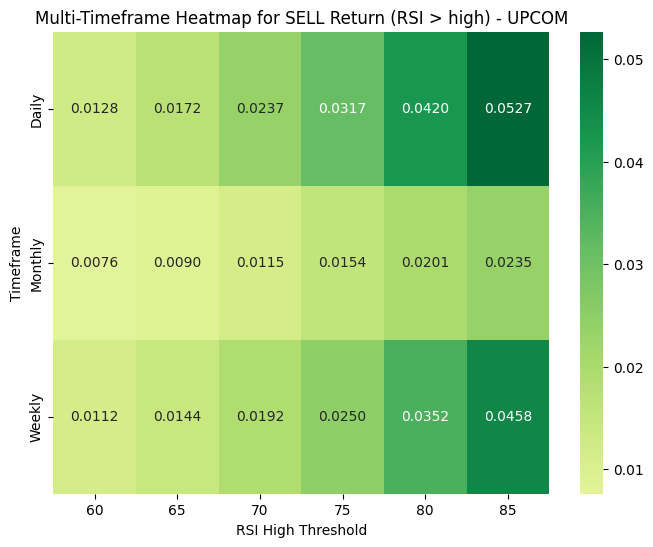

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_vnindex = data[data["exchange"] == "VNINDEX"].copy()
data_hnx = data[data["exchange"] == "HNXINDEX"].copy()
data_upcom = data[data["exchange"] == "UPCOM"].copy()

# Hàm vẽ Risk-Return Scatter Plot

def plot_risk_return(df, exchange_name):
    df = df.copy()

    # BUY signals (RSI < low)
    buy_points = []
    for low in range(10, 40, 5):
        df_filtered = df[df["rsi"] < low]
        if not df_filtered.empty:
            avg_return = df_filtered["return"].mean()
            risk = df_filtered["return"].std()
            buy_points.append([low, avg_return, risk])

    if buy_points:
        buy_df = pd.DataFrame(buy_points, columns=["low", "avg_return", "risk"])
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(
            buy_df["risk"], buy_df["avg_return"], 
            c=buy_df["low"], cmap="viridis", s=100
        )
        plt.colorbar(scatter, label="RSI Low Threshold")
        plt.title(f"Risk-Return Scatter Plot for BUY Signals (RSI < low) - {exchange_name}")
        plt.xlabel("Risk (Standard Deviation of Returns)")
        plt.ylabel("Average Return")
        plt.grid(True)
        plt.show()

    # SELL signals (RSI > high)
    sell_points = []
    for high in range(60, 90, 5):
        df_filtered = df[df["rsi"] > high]
        if not df_filtered.empty:
            avg_return = df_filtered["return"].mean()
            risk = df_filtered["return"].std()
            sell_points.append([high, avg_return, risk])

    if sell_points:
        sell_df = pd.DataFrame(sell_points, columns=["high", "avg_return", "risk"])
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(
            sell_df["risk"], sell_df["avg_return"], 
            c=sell_df["high"], cmap="plasma", s=100
        )
        plt.colorbar(scatter, label="RSI High Threshold")
        plt.title(f"Risk-Return Scatter Plot for SELL Signals (RSI > high) - {exchange_name}")
        plt.xlabel("Risk (Standard Deviation of Returns)")
        plt.ylabel("Average Return")
        plt.grid(True)
        plt.show()



# Hàm vẽ Multi-timeframe Heatmap

def plot_multi_timeframe_heatmap(df, exchange_name):
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values(["ticker", "timestamp"])

    # Các timeframe: daily (gốc), weekly, monthly
    timeframes = {"Daily": None, "Weekly": "W", "Monthly": "ME"}
    heatmap_data_buy = []
    heatmap_data_sell = []

    for tf_name, tf_freq in timeframes.items():
        if tf_freq is None:
            df_tf = df.copy()
        else:
            # Resample per ticker
            df_tf = (
                df.set_index("timestamp")
                .groupby("ticker")
                .resample(tf_freq)
                .agg({
                    "open": "first",
                    "high": "max",
                    "low": "min",
                    "close": "last",
                    "volume": "sum",
                    "rsi": "last",
                    "return": "mean"
                })
                .reset_index()
            )

        if df_tf.empty:
            continue 

        # For BUY: avg_return cho từng low
        for low in range(10, 40, 5):
            avg_return = (
                df_tf[df_tf["rsi"] < low]["return"].mean()
                if not df_tf[df_tf["rsi"] < low].empty else np.nan
            )
            heatmap_data_buy.append([tf_name, low, avg_return])

        # For SELL: avg_return cho từng high
        for high in range(60, 90, 5):
            avg_return = (
                df_tf[df_tf["rsi"] > high]["return"].mean()
                if not df_tf[df_tf["rsi"] > high].empty else np.nan
            )
            heatmap_data_sell.append([tf_name, high, avg_return])

    # Heatmap BUY
    if heatmap_data_buy:
        heatmap_buy_df = pd.DataFrame(heatmap_data_buy, columns=["Timeframe", "Low", "avg_return"])
        pivot_buy = heatmap_buy_df.pivot(index="Timeframe", columns="Low", values="avg_return")

        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_buy, annot=True, cmap="RdYlGn", center=0, fmt=".4f")
        plt.title(f"Multi-Timeframe Heatmap for BUY Return (RSI < low) - {exchange_name}")
        plt.xlabel("RSI Low Threshold")
        plt.ylabel("Timeframe")
        plt.show()

    # Heatmap SELL
    if heatmap_data_sell:
        heatmap_sell_df = pd.DataFrame(heatmap_data_sell, columns=["Timeframe", "High", "avg_return"])
        pivot_sell = heatmap_sell_df.pivot(index="Timeframe", columns="High", values="avg_return")

        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_sell, annot=True, cmap="RdYlGn", center=0, fmt=".4f")
        plt.title(f"Multi-Timeframe Heatmap for SELL Return (RSI > high) - {exchange_name}")
        plt.xlabel("RSI High Threshold")
        plt.ylabel("Timeframe")
        plt.show()

# Gọi hàm cho từng sàn
plot_risk_return(data_vnindex, "VNINDEX")
plot_multi_timeframe_heatmap(data_vnindex, "VNINDEX")

plot_risk_return(data_hnx, "HNXINDEX")
plot_multi_timeframe_heatmap(data_hnx, "HNXINDEX")

plot_risk_return(data_upcom, "UPCOM")
plot_multi_timeframe_heatmap(data_upcom, "UPCOM")
